<a href="https://colab.research.google.com/github/MayerT1/Pakistan_Research/blob/main/Spatial_Autocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install geemap

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [4]:
import ee
import geemap
import geemap.chart as chart
ee.Authenticate()
ee.Initialize(project='servir-sco-assets')
Map = geemap.Map()

In [16]:
js_snippet = """



var pfi_test_roi = ee.Geometry.Rectangle([72.68095513823965,34.282270256791925, 72.83888360503653,34.406429412779026])
var background = ee.Feature(pfi_test_roi, {"height": 0})
Map.addLayer(background, {}, "background")

var gedi = ee.Image("projects/servir-sco-assets/assets/SCO_HKH/KP_Height_Prelim/GEDIindicesA_2022").clip(pfi_test_roi).select("rh100").int()
print(gedi)
Map.addLayer(gedi, {}, "gedi")

var gedi_shapefile = gedi.addBands(gedi).reduceToVectors({
  geometry: pfi_test_roi,
  crs: gedi.projection(),
  scale: 10,
  geometryType: 'polygon',
  eightConnected: false,
  labelProperty: 'height',
  reducer: ee.Reducer.max(),
  maxPixels: 10000000000
}).copyProperties(gedi);
print(gedi_shapefile)
// Map.addLayer(ee.FeatureCollection(gedi_shapefile), {}, "gedi_shapefile")

gedi_shapefile = ee.FeatureCollection(gedi_shapefile).merge(background)
Map.addLayer(gedi_shapefile, {}, "gedi_shapefile")


"""

In [17]:

geemap.js_snippet_to_py(
    js_snippet, add_new_cell=True, import_ee=True, import_geemap=True, show_map=True
)

print(gedi.getInfo())
print(gedi_shapefile.getInfo())


In [18]:

lines = geemap.js_snippet_to_py(js_snippet, add_new_cell=False, import_ee=True, import_geemap=True, show_map=True)
for line in lines:
    print(line.rstrip())

print(gedi.getInfo())
print(gedi_shapefile.getInfo())
import ee
import geemap
Map = geemap.Map()
import geemap

Map = geemap.Map()

pfi_test_roi = ee.Geometry.Rectangle([72.68095513823965,34.282270256791925, 72.83888360503653,34.406429412779026])
background = ee.Feature(pfi_test_roi, {"height": 0})
Map.addLayer(background, {}, "background")

gedi = ee.Image("projects/servir-sco-assets/assets/SCO_HKH/KP_Height_Prelim/GEDIindicesA_2022").clip(pfi_test_roi).select("rh100").int()
print(gedi.getInfo())
Map.addLayer(gedi, {}, "gedi")

gedi_shapefile = gedi.addBands(gedi).reduceToVectors(
geometry = pfi_test_roi,
crs = gedi.projection(),
scale = 10,
geometryType = 'polygon',
eightConnected = False,
labelProperty = 'height',
reducer = ee.Reducer.max(),
maxPixels = 10000000000
).copyProperties(gedi)
print(gedi_shapefile.getInfo())
# Map.addLayer(ee.FeatureCollection(gedi_shapefile), {}, "gedi_shapefile")

gedi_shapefile = ee.FeatureCollection(gedi_shapefile).merge(background)
Map.addLayer(gedi_

https://code.earthengine.google.com/1a38e05ea250fbf6b3a270903d33808b

In [19]:
pfi_test_roi = ee.Geometry.Rectangle([72.68095513823965,34.282270256791925, 72.83888360503653,34.406429412779026])
background = ee.Feature(pfi_test_roi, {"height": 0})
Map.addLayer(background, {}, "background")

gedi = ee.Image("projects/servir-sco-assets/assets/SCO_HKH/KP_Height_Prelim/GEDIindicesA_2022").clip(pfi_test_roi).select("rh100").int()
print(gedi.getInfo())
Map.addLayer(gedi, {}, "gedi")

gedi_shapefile = gedi.addBands(gedi).reduceToVectors(
geometry = pfi_test_roi,
crs = gedi.projection(),
scale = 10,
geometryType = 'polygon',
eightConnected = False,
labelProperty = 'height',
reducer = ee.Reducer.max(),
maxPixels = 10000000000
).copyProperties(gedi)
print(gedi_shapefile.getInfo())
# Map.addLayer(ee.FeatureCollection(gedi_shapefile), {}, "gedi_shapefile")

gedi_shapefile = ee.FeatureCollection(gedi_shapefile).merge(background)
Map.addLayer(gedi_shapefile, {}, "gedi_shapefile")

Map.centerObject(gedi)
Map

{'type': 'Image', 'bands': [{'id': 'rh100', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -2147483648, 'max': 2147483647}, 'dimensions': [1505, 1432], 'origin': [24955, 28060], 'crs': 'EPSG:32642', 'crs_transform': [10, 0, 588835, 0, -10, 4094510]}], 'version': 1721246627056501, 'id': 'projects/servir-sco-assets/assets/SCO_HKH/KP_Height_Prelim/GEDIindicesA_2022', 'properties': {'system:footprint': {'type': 'Polygon', 'coordinates': [[[72.68095513823965, 34.282270256791925], [72.83888360503653, 34.282270256791925], [72.83888360503653, 34.406429412779026], [72.68095513823965, 34.406429412779026], [72.68095513823965, 34.282270256791925]]]}, 'system:asset_size': 18110343374}}
{'type': 'FeatureCollection', 'columns': {'height': 'Integer', 'max': 'Integer', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[72.68099376118315, 34.40247527387545], [72.68110233808117, 34.402472002507636], [72.681114178

Map(bottom=417961.0, center=[34.34436251869118, 72.75991937163809], controls=(WidgetControl(options=['position…

Spatial Autocorrelation

https://geographicdata.science/book/notebooks/07_local_autocorrelation.html

In [21]:
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 43.5 MB/s eta 0:00:00


In [23]:
!pip install pysal

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 43.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.3/347.3 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 8.0 MB/s eta 0:00:00
  Created wheel for spint: filename=spint-1.0

In [25]:
!pip install contextily

In [26]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn  # Graphics
import geopandas  # Spatial data manipulation
import pandas  # Tabular data manipulation
import rioxarray  # Surface data manipulation
import xarray  # Surface data manipulation
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles

In [36]:
db = geemap.ee_to_gdf(gedi_shapefile)
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  4552 non-null   geometry
 1   height    4552 non-null   int64   
 2   max       4551 non-null   float64 
dtypes: float64(1), geometry(1), int64(1)
memory usage: 106.8 KB


In [37]:
db

,geometry,height,max
0,"POLYGON ((72.68099 34.40248, 72.68110 34.40247...",27,27.0
1,"POLYGON ((72.68098 34.39464, 72.68108 34.39463...",7,7.0
2,"POLYGON ((72.68134 34.40301, 72.68167 34.40300...",21,21.0
3,"POLYGON ((72.68132 34.39508, 72.68154 34.39507...",31,31.0
4,"POLYGON ((72.68189 34.40317, 72.68211 34.40316...",22,22.0
...,...,...,...
4547,"POLYGON ((72.83826 34.36096, 72.83858 34.36095...",4,4.0
4548,"POLYGON ((72.83796 34.35196, 72.83817 34.35195...",2,2.0
4549,"POLYGON ((72.83818 34.35222, 72.83851 34.35221...",3,3.0
4550,"POLYGON ((72.83875 34.35266, 72.83886 34.35265...",3,3.0


In [38]:
# Generate W from the GeoDataFrame
w = weights.distance.KNN.from_dataframe(db, k=8)
# Row-standardization
w.transform = "R"

In [47]:
db["w_height"] = weights.lag_spatial(w, db['height'])

In [48]:
db["height_std"] = db["height"] - db["height"].mean()
db["w_height_std"] = weights.lag_spatial(w, db['height_std'])

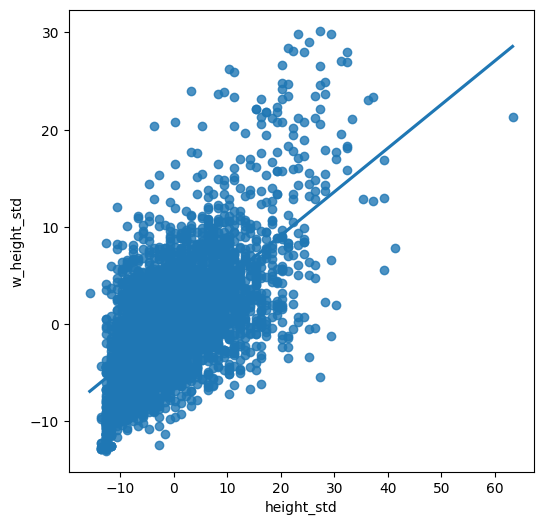

In [41]:
# # Set up the figure and axis
# f, ax = plt.subplots(1, figsize=(6, 6))
# # Plot values
# seaborn.regplot(
#     x="height_std", y="w_height_std", data=db, ci=None
# )
# plt.show()

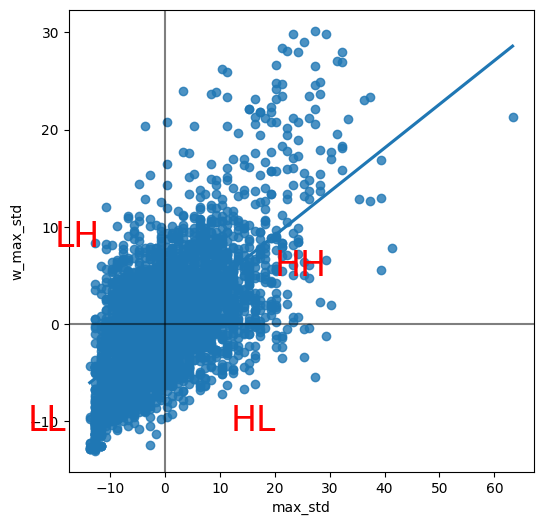

In [49]:
# Set up the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(
    x="height_std", y="w_height_std", data=db, ci=None
)
# Add vertical and horizontal lines
plt.axvline(0, c="k", alpha=0.5)
plt.axhline(0, c="k", alpha=0.5)
# Add text labels for each quadrant
plt.text(20, 5, "HH", fontsize=25, c="r")
plt.text(12, -11, "HL", fontsize=25, c="r")
plt.text(-20, 8.0, "LH", fontsize=25, c="r")
plt.text(-25, -11.0, "LL", fontsize=25, c="r")
# Display
plt.show()

In [55]:
lisa = esda.moran.Moran_Local(db["height"], w)

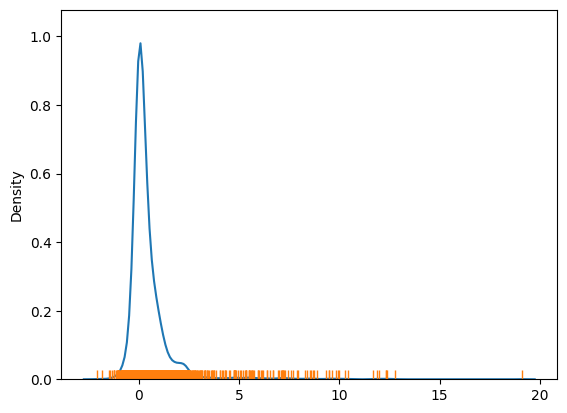

In [56]:
# Draw KDE line
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

In [53]:
from splot import esda as esdaplot

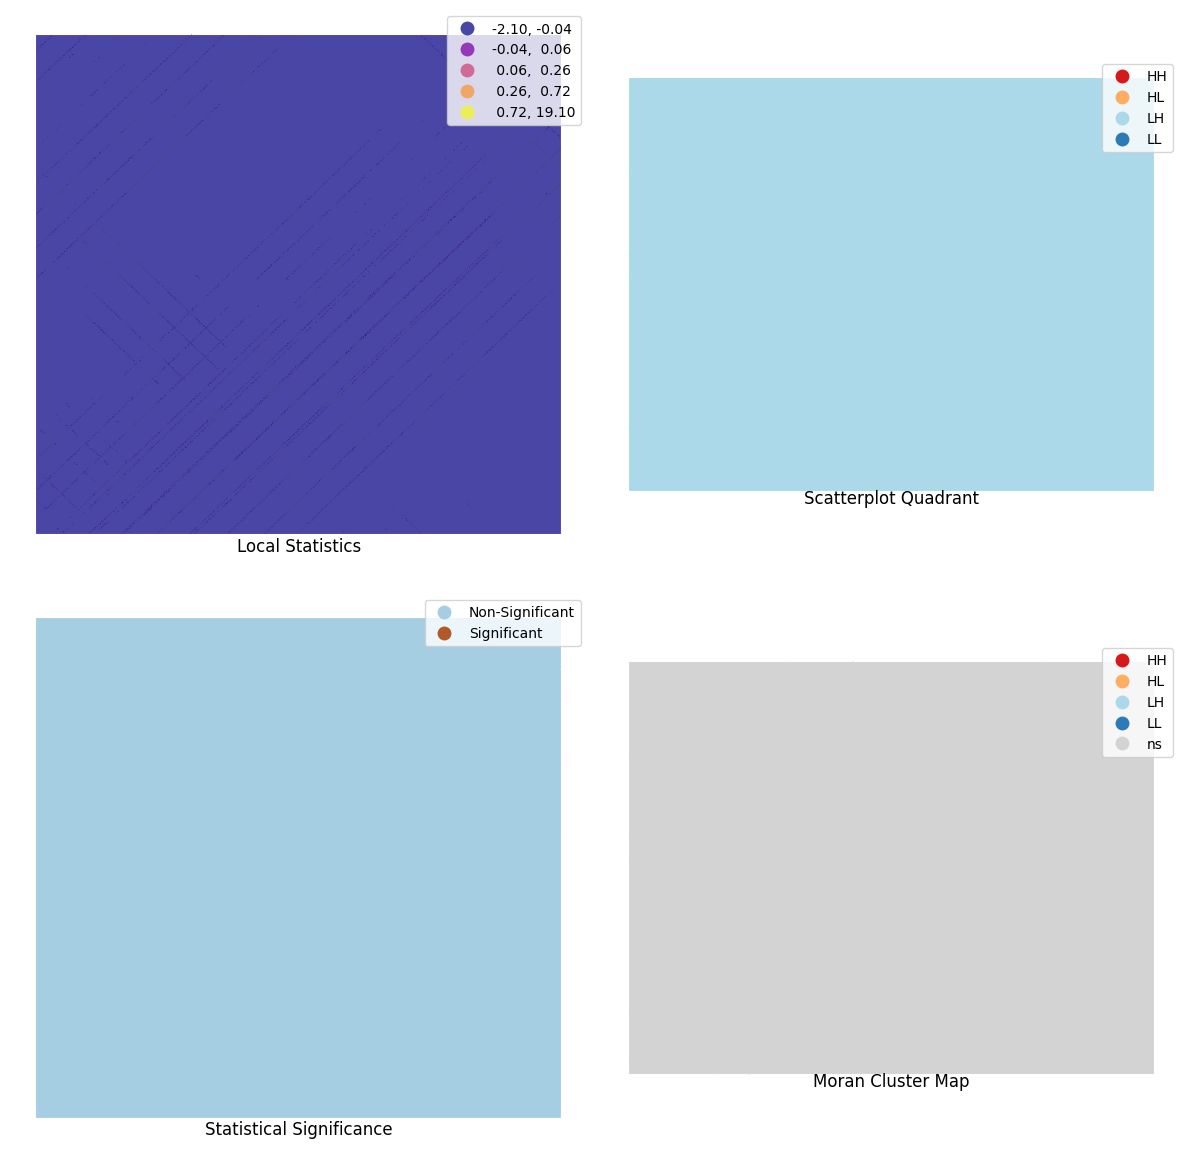

In [57]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
db.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
).plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quadrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, db, p=1, ax=ax)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pandas.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=db.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `db` on the fly
db.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quadrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, db, p=0.05, ax=ax)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimize in-between white space
f.tight_layout()

# Display the figure
plt.show()

In [58]:
lisa.q[:10]

array([1, 2, 1, 1, 1, 3, 1, 2, 1, 3])

In [59]:
counts = pandas.value_counts(lisa.q)
counts

,count
3,1785
1,1498
2,722
4,547


In [60]:
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

34.90773286467487

In [61]:
# Assign pseudo P-values to `db`
db["p-sim"] = lisa.p_sim
# `1` if significant (at 5% confidence level), `0` otherwise
sig = 1 * (lisa.p_sim < 0.05)
# Assign significance flag to `db`
db["sig"] = sig
# Print top of the table to inspect
db[["sig", "p-sim"]].head()

,sig,p-sim
0,0,0.171
1,0,0.109
2,0,0.124
3,0,0.407
4,0,0.131


In [62]:
# Print bottom of the table to inspect
db[["sig", "p-sim"]].tail()

,sig,p-sim
4547,1,0.001
4548,1,0.001
4549,1,0.001
4550,1,0.001
4551,0,0.132


In [63]:
# Pick as part of a quadrant only significant polygons,
# assign `0` otherwise (Non-significant polygons)
spots = lisa.q * sig
# Mapping from value to name (as a dict)
spots_labels = {
    0: "Non-Significant",
    1: "HH",
    2: "LH",
    3: "LL",
    4: "HL",
}
# Create column in `db` with labels for each polygon
db["labels"] = pandas.Series(
    # First initialise a Series using values and `db` index
    spots,
    index=db.index
    # Then map each value to corresponding label based
    # on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection
db["labels"].head()

,labels
0,Non-Significant
1,Non-Significant
2,Non-Significant
3,Non-Significant
4,Non-Significant


In [64]:
db["labels"].value_counts()

,count
labels,
Non-Significant,2963
LL,814
HH,569
LH,123
HL,83
